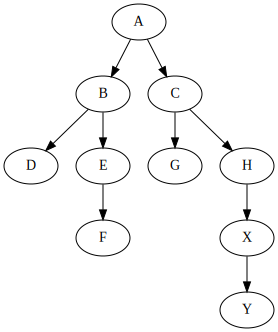

In [1]:
from graphviz import Graph, Digraph

g = Digraph()
g.edge("A", "B")
g.edge("A", "C")
g.edge("B", "D")
g.edge("B", "E")
g.edge("E", "F")
#g.edge("B", "G")
g.edge("C", "G")
g.edge("C", "H")
g.edge("X", "Y")
g.edge("H", "X")
g


In [18]:
from graphviz import Digraph
from IPython.core.display import display

# Binary Search Tree, need to follow the "BST Rule":
# for any node, the values in its left subtree are smaller than that node's value
# AND the values in its right subtree are bigger than that node's value

class Node:
    def __init__(self, name):
        self.name = name
        self.left = None
        self.right = None

    # prints out all the node names
    def dump(self, indent):
        print("    "*indent + str(self.name))

        if self.left != None:
            self.left.dump(indent+1)

        if self.right != None:
            self.right.dump(indent+1)
    
    # recursive: draw nodes and edges at all levels of the tree
    def draw(self, gv):
        gv.node(str(self.name))
        
        if self.left != None:
            gv.edge(str(self.name), str(self.left.name), label="L")
            self.left.draw(gv)
            
        if self.right != None:
            gv.edge(str(self.name), str(self.right.name), label="R")
            self.right.draw(gv)

    # non-recursive: create Digraph one time for all nodes to use
    def to_graphviz(self):
        gv = Digraph()
        self.draw(gv)
        return gv
    
    def search(self, target):
        if target == self.name:
            return True
        
        if self.left != None:
            if self.left.search(target):
                return True
        
        if self.right != None:
            if self.right.search(target):
                return True

        return False
    
    def bst_search(self, target):
        if target == self.name:
            return True
        
        if target < self.name:
            # GO LEFT
            if self.left != None:
                if self.left.bst_search(target):
                    return True
        else:
            # GO RIGHT
            if self.right != None:
                if self.right.bst_search(target):
                    return True
        return False
    
    def add(self, name):
        if name < self.name:
            # GO LEFT
            if self.left != None:
                self.left.add(name)
            else:
                self.left = Node(name)
        else:
            # GO RIGHT
            if self.right != None:
                self.right.add(name)
            else:
                self.right = Node(name)
                
    def height(self):
        # left subtree has height 2; right subtree has height 2, my height is 3
        # left has 5; right has 3; my height is 6
        # left has M; right has N; my height is max(M, N) + 1
        # height(me) = max(height(left) + height(right)) + 1
        if self.left:
            left_height = self.left.height()
        else:
            left_height = 0
        if self.right:
            right_height = self.right.height()
        else:
            right_height = 0
        return max(left_height, right_height) + 1
    
    def __contains__(self, lookup):
        return self.bst_search(lookup)

def example_tree():
    root = Node(10)
    root.left = Node(2)
    root.left.left = Node(1)
    root.left.right = Node(4)
    root.left.right.left = Node(3)
    root.right = Node(15)
    root.right.left = Node(12)
    root.right.right = Node(19)
    root.left.right.right = Node(8)
    return root

root = Node(3)
for v in [2,5,1,4,6]:
    root.add(v)
    
print(5 in root)  # shorthand for root.__contains__(5)
print(8 in root)

True
False


13


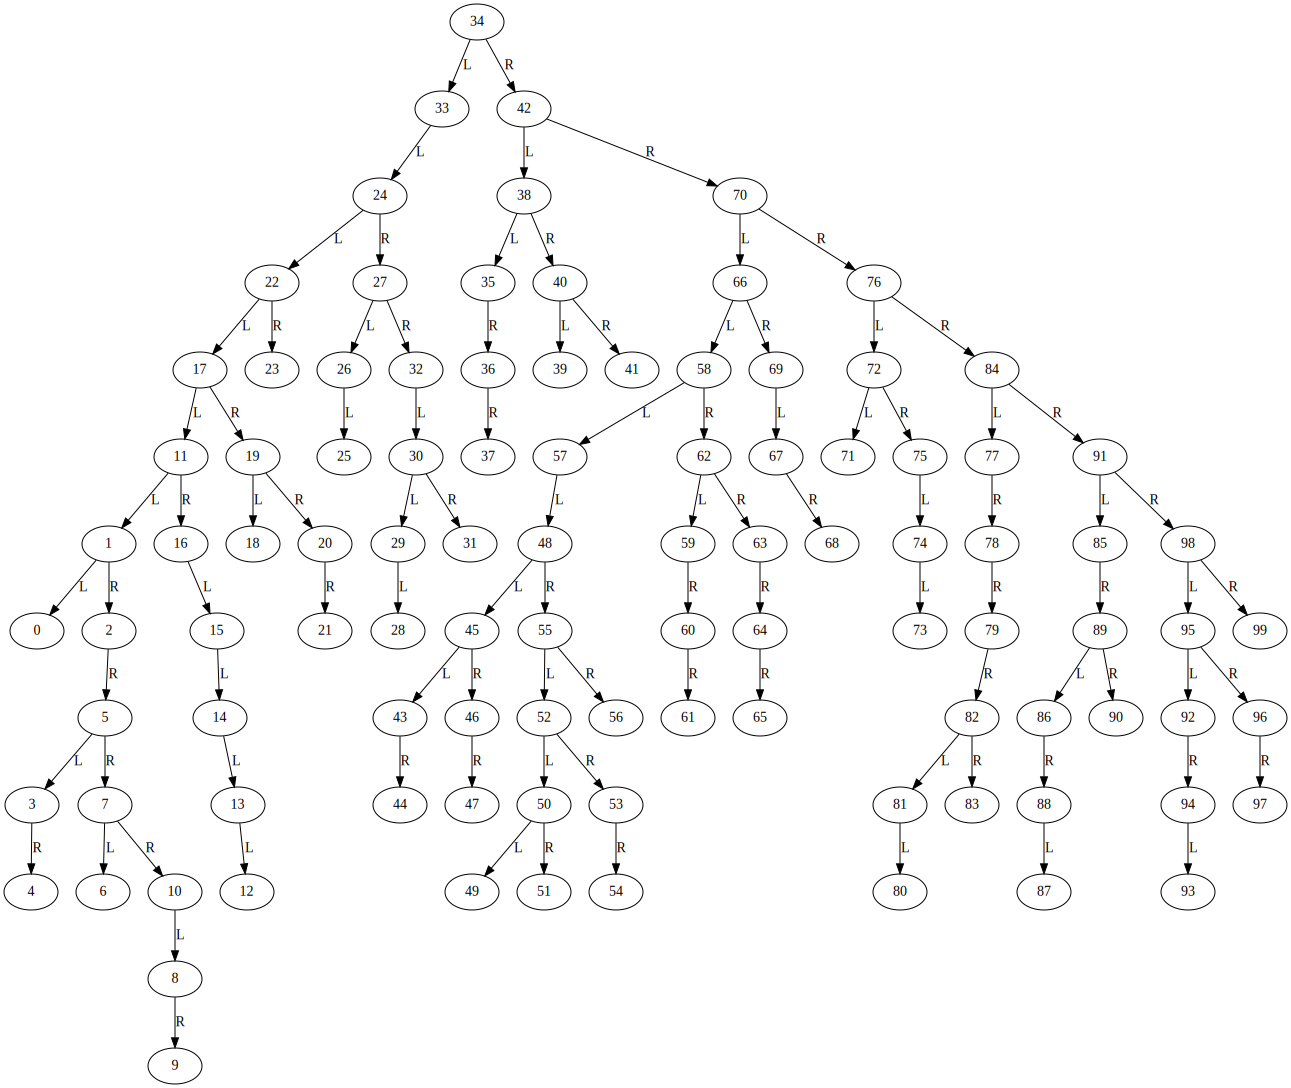

In [16]:
print(root.height())
    
root.to_graphviz()

In [14]:
values = list(range(100))
root = Node(values[0])
for v in values[1:]:
    root.add(v)

print(root.height())

100


13


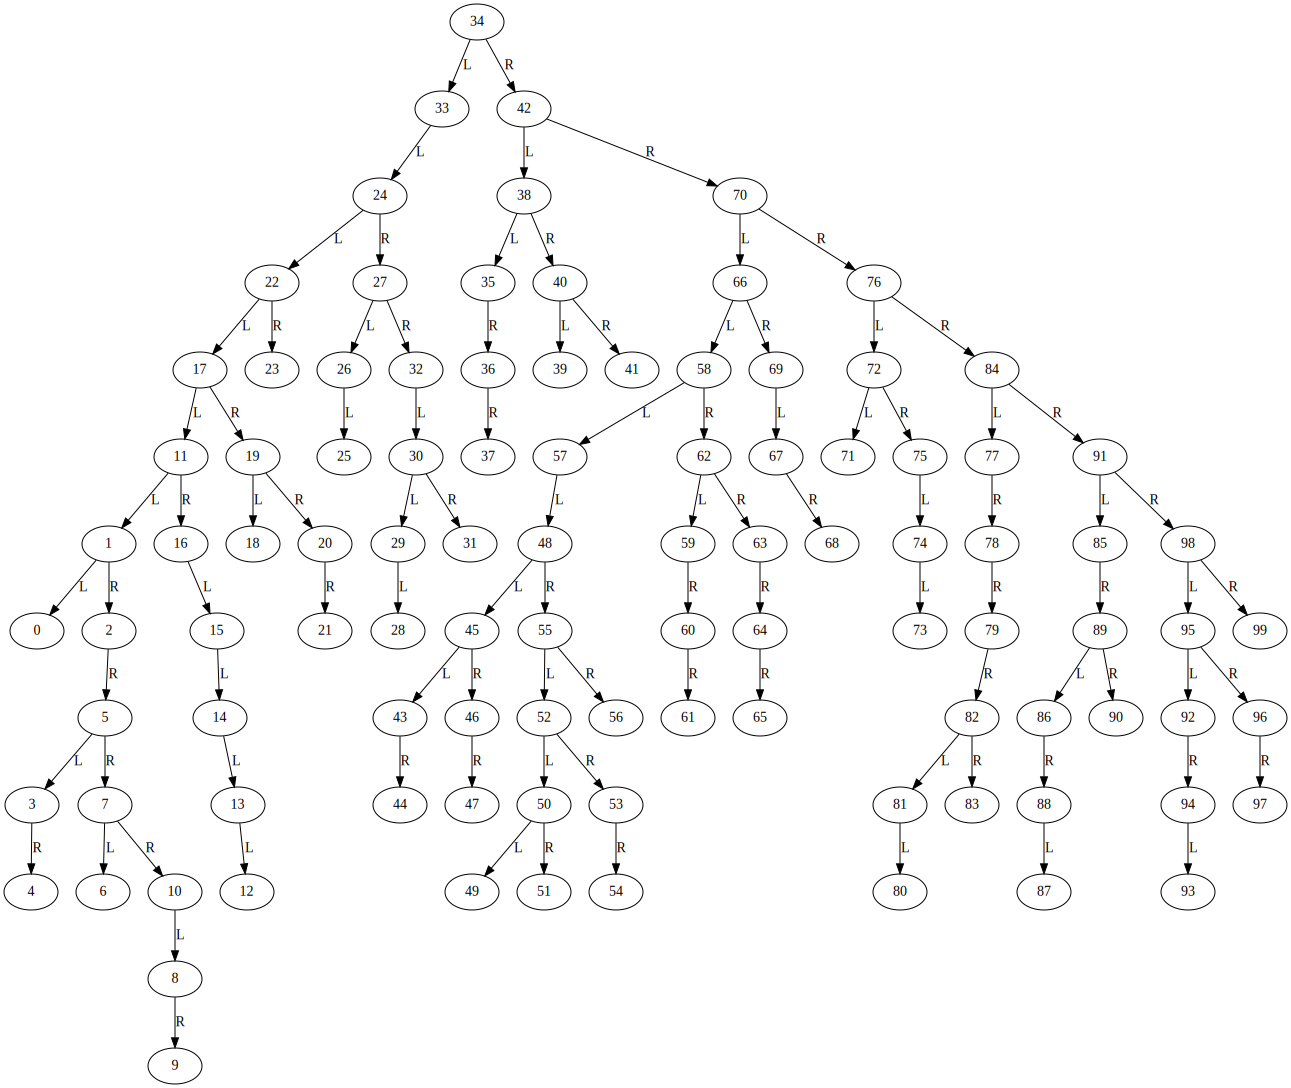

In [15]:
# complexity of BST lookup
# worst case: O(N) where N is the number of nodes
# worst case: O(H) where H is the height of the tree
# for a balanced tree, H is about log2(N)
# for a balanced tree, O(log N), where N is the number of nodes

import random
values = list(range(100))
random.shuffle(values)
root = Node(values[0])
for v in values[1:]:
    root.add(v)

print(root.height())

root.to_graphviz()

# BSTs as dictionaries

In [26]:
from graphviz import Digraph
from IPython.core.display import display

# Binary Search Tree, need to follow the "BST Rule":
# for any node, the values in its left subtree are smaller than that node's value
# AND the values in its right subtree are bigger than that node's value

class Node:
    def __init__(self, key, value):
        self.name = key
        self.value = value
        self.left = None
        self.right = None

    # prints out all the node names
    def dump(self, indent):
        print("    "*indent + str(self.name))

        if self.left != None:
            self.left.dump(indent+1)

        if self.right != None:
            self.right.dump(indent+1)
    
    # recursive: draw nodes and edges at all levels of the tree
    def draw(self, gv):
        gv.node(str(self.name))
        
        if self.left != None:
            gv.edge(str(self.name), str(self.left.name), label="L")
            self.left.draw(gv)
            
        if self.right != None:
            gv.edge(str(self.name), str(self.right.name), label="R")
            self.right.draw(gv)

    # non-recursive: create Digraph one time for all nodes to use
    def to_graphviz(self):
        gv = Digraph()
        self.draw(gv)
        return gv
    
    def search(self, target):
        if target == self.name:
            return True
        
        if self.left != None:
            if self.left.search(target):
                return True
        
        if self.right != None:
            if self.right.search(target):
                return True

        return False
    
    def bst_search(self, target):
        if target == self.name:
            return self.value
        
        if target < self.name:
            # GO LEFT
            if self.left != None:
                result = self.left.bst_search(target)
                if result != None:
                    return result
        else:
            # GO RIGHT
            if self.right != None:
                result = self.right.bst_search(target)
                if result != None:
                    return result
        return None
    
    def __getitem__(self, lookup):
        return self.bst_search(lookup)
    
    def add(self, name, value):
        if name < self.name:
            # GO LEFT
            if self.left != None:
                self.left.add(name, value)
            else:
                self.left = Node(key=name, value=value)
        else:
            # GO RIGHT
            if self.right != None:
                self.right.add(name, value)
            else:
                self.right = Node(key=name, value=value)
                
    def height(self):
        # left subtree has height 2; right subtree has height 2, my height is 3
        # left has 5; right has 3; my height is 6
        # left has M; right has N; my height is max(M, N) + 1
        # height(me) = max(height(left) + height(right)) + 1
        if self.left:
            left_height = self.left.height()
        else:
            left_height = 0
        if self.right:
            right_height = self.right.height()
        else:
            right_height = 0
        return max(left_height, right_height) + 1


root = Node("A", 3)
for k,v in [("B", 5), ("C", 8)]:
    root.add(k, v)
    
print(root["C"]) # shorthand for root.__getitem__("B")
print(root["D"])

8
None
